  metal  facet  atomic_number  electronegativity  d_electron_count     E_ads
0    Ni    111             28               1.91                 8 -0.225829
1    Ni    110             28               1.91                 8 -0.289326
2    Ni    100             28               1.91                 8 -0.210731
3    Ni      1             28               1.91                 8 -0.123197
4    Co    111             27               1.88                 7 -0.317415
            facet  atomic_number  electronegativity  d_electron_count  \
count   48.000000      48.000000          48.000000          48.00000   
mean    80.500000      47.083333           2.122500           8.00000   
std     46.588283      19.083058           0.220217           1.75038   
min      1.000000      26.000000           1.830000           5.00000   
25%     75.250000      28.750000           1.907500           6.75000   
50%    105.000000      44.500000           2.180000           8.00000   
75%    110.250000      53.7

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

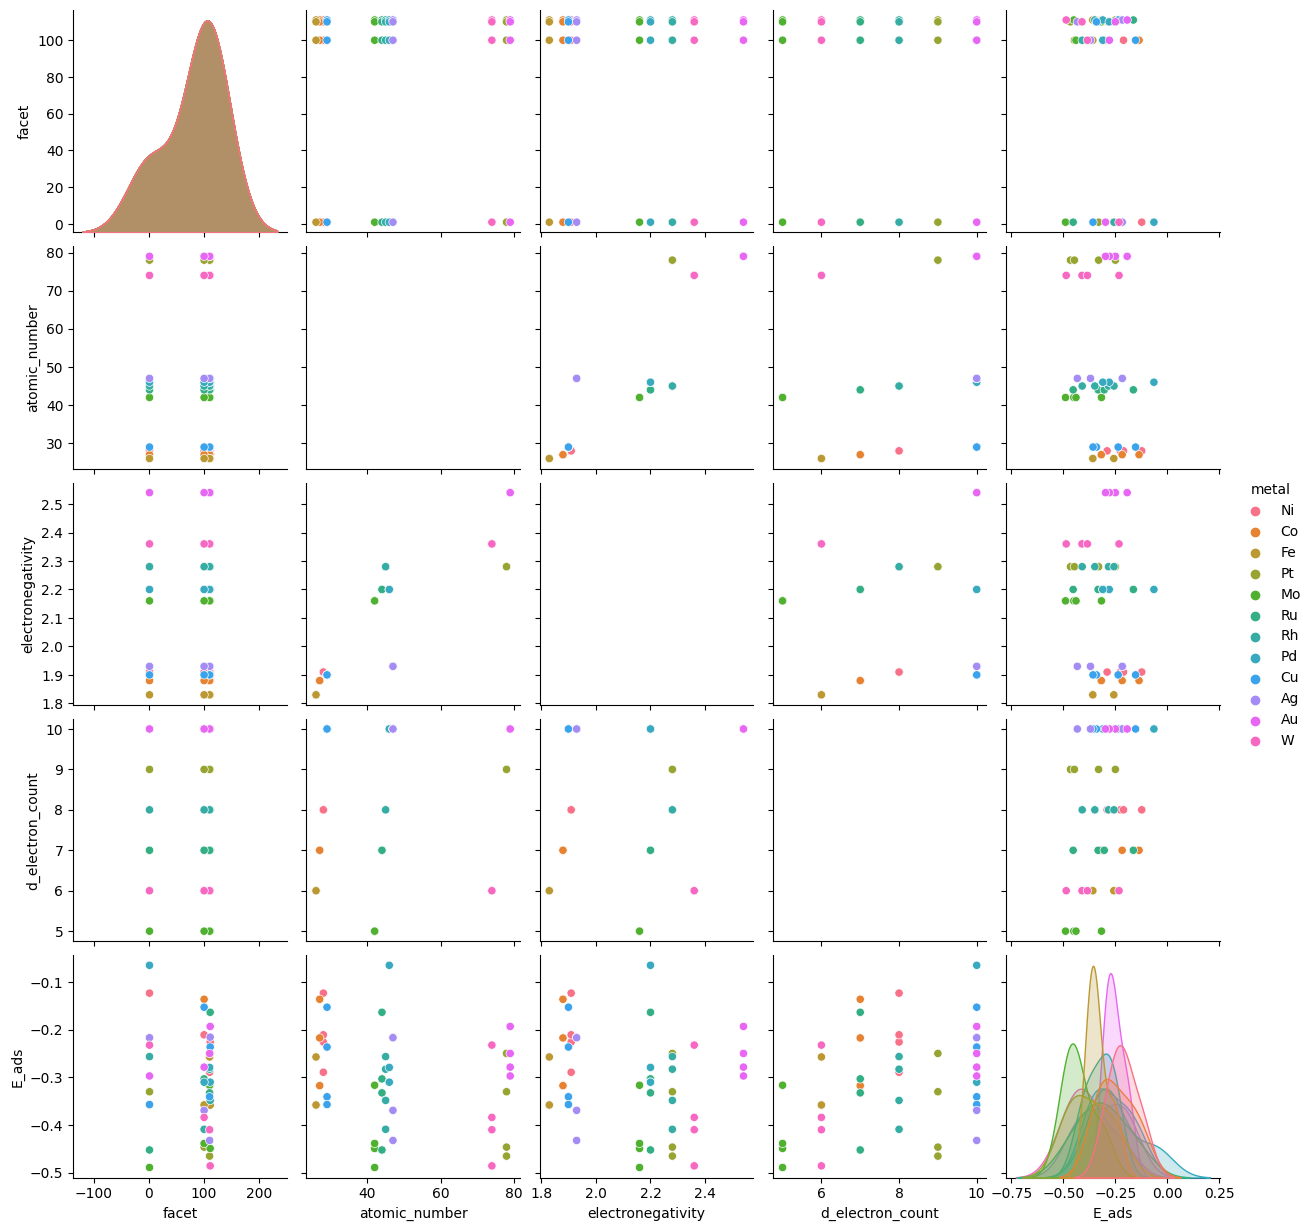

Linear Regression MAE: 0.08098498761067077
Linear Regression R2: -0.26464736722841864
Random Forest MAE: 0.08231251482490126
Random Forest R2: -0.16670350014416657
XGBoost MAE: 0.09052745077554877
XGBoost R2: -0.4652247904113298


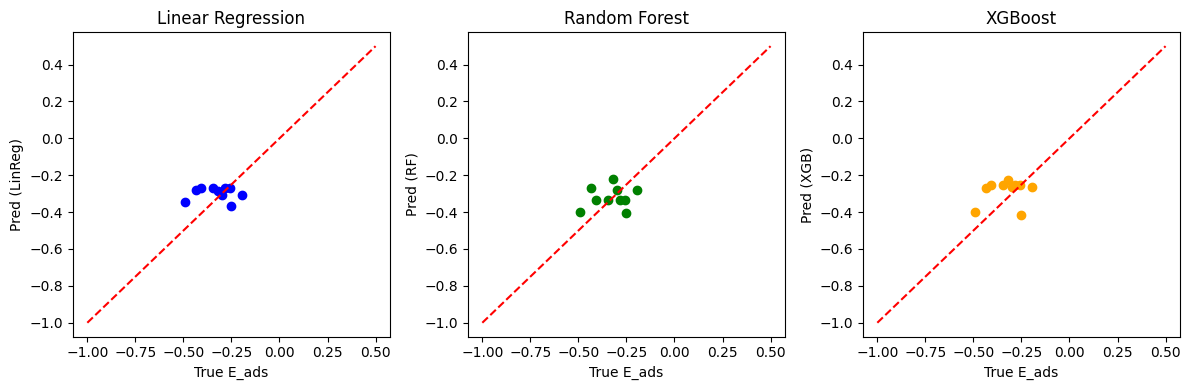

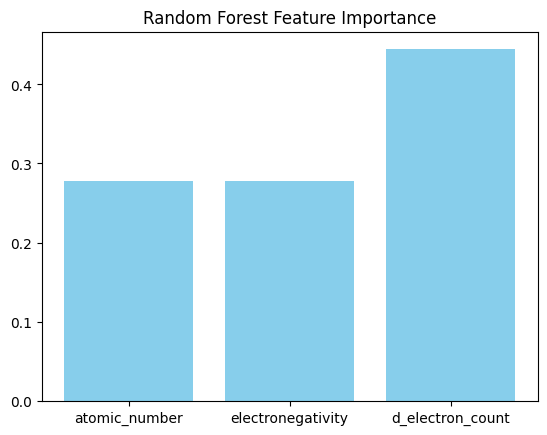

In [2]:
# Hydrogen Adsorption ML Project
# Author: Aneena Raphel

# --- Step 1: Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# --- Step 2: Load dataset ---
df = pd.read_csv("/kaggle/input/hydrogen-adsorption-dataset/hydrogen_adsorption_dataset.csv")
print(df.head())

# --- Step 3: Exploratory Data Analysis ---
print(df.describe())
sns.pairplot(df, hue="metal", diag_kind="kde")
plt.show()

# --- Step 4: Features & Target ---
X = df[["atomic_number", "electronegativity", "d_electron_count"]]
y = df["E_ads"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 5: Linear Regression ---
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lin))
print("Linear Regression R2:", r2_score(y_test, y_pred_lin))

# --- Step 6: Random Forest ---
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

# --- Step 7: XGBoost ---
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))

# --- Step 8: Parity Plots ---
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_lin, c='blue')
plt.plot([-1,0.5], [-1,0.5], 'r--')
plt.xlabel("True E_ads"); plt.ylabel("Pred (LinReg)")
plt.title("Linear Regression")

plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_rf, c='green')
plt.plot([-1,0.5], [-1,0.5], 'r--')
plt.xlabel("True E_ads"); plt.ylabel("Pred (RF)")
plt.title("Random Forest")

plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_xgb, c='orange')
plt.plot([-1,0.5], [-1,0.5], 'r--')
plt.xlabel("True E_ads"); plt.ylabel("Pred (XGB)")
plt.title("XGBoost")

plt.tight_layout()
plt.show()

# --- Step 9: Feature Importance (Random Forest) ---
importances = rf.feature_importances_
features = X.columns
plt.bar(features, importances, color='skyblue')
plt.title("Random Forest Feature Importance")
plt.show()
